In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 20, 'image.cmap': 'gray_r'})

# A visual introduction to NumPy and Matplotlib

**Author:** Florencia Noriega

Material modified from the CODE student's Hackathon 29.03.2019


<a title="David Cournapeau [BSD (http://opensource.org/licenses/bsd-license.php)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:NumPy_logo.svg"><img width="280" alt="NumPy logo" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/512px-NumPy_logo.svg.png"></a>

<img src="https://matplotlib.org/mpl_examples/api/logo2.png" width="300" alt=Matplotlib plots>



## Why NumPy?

* A powerful N-dimension **array** object

* Basic and not so basic **math** operations
      * Arithmetics
      * **Linear** algebra operations
      * Random numbers, FFT, …

* **Basis** for other modules

<img src="https://image.slidesharecdn.com/scientific-python-151121091532-lva1-app6892/95/scientific-python-28-638.jpg?cb=1448101074" alt="Python Scientific Stack" width="600"/>

and many more

## NumPy arrays are useful

* Homogeneous data:
  - Experimental data sets
  - Simulations
  - …



**For example**:

NumPy can be much faster:

In [3]:
x = np.linspace(0, 9, 100001)

In [4]:
%%timeit
numpy_result = np.sqrt(x)

72.4 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
from math import sqrt
x = list(x)

In [6]:
%%timeit
python_result = [sqrt(value) for value in x]

7.04 ms ± 62.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(The actual speedup depends, but it can be much more for simple operations like $\times, +$)

# Load data into a Numpy array

In [21]:
inF = 'data/some_data.txt'
arr = np.loadtxt(inF)
n0, n1 = np.shape(arr)
print("shape {}\nrange ({}, {})\ndtype {}".format((n0, n1), 
                                                  np.min(arr), 
                                                  np.max(arr), arr.dtype))

shape (155, 500)
range (0.0, 1.0)
dtype float64



**NumPy Arrayas**
* _Normally_ **homogenous data** (i.e. numbers)
* Dimensions are called axes
* Number of axes, or dimensions, is the rank


<img src="https://cdn-images-1.medium.com/max/2000/1*Ikn1J6siiiCSk4ivYUhdgw.png" alt="numpy array" width="600"/>

Image from medium.com

Some important **attributes** of an **ndarray** object are:

`ndarray.ndim`    
    number of axes (dimensions) of the array
   
`ndarray.shape`    
number of elements in each axis

`ndarray.size`   
number of elements in the array

`ndarray.dtype`   
data type of the stored elements

⚡What is the size of the array?

⚡What is the dimension?


In [10]:
arr.size

77500

In [12]:
arr.shape

(155, 500)

## Creating NumPy arrays

### Loading data
```python 
np.loadtxt('path/to/file.txt')```

### Typing elements

1 dimension  
```python 
np.array([3,2,1])```

2 dimensions 

```python
np.array([[1, 2],
          [3, 4],
          [5, 6]])```

3 dimensions 
```python
np.array([[[1, 2],
           [2, 3]],
          [[4, 5],
           [8, 9]]])```


### Generate arrays

```python
zeros, zeros_like, ones, ones_like, empty, empty_like, arange, 
linspace, numpy.random.rand, numpy.random.randn, fromfunction, fromfile,
full, loadtxt, eye, diag```

## What kind of data do we have in the array?

We know that the array stores floats, but what kind of values do we have?
We can use `Matplotlib` to create an histogram of the values in the array

Text(0, 0.5, 'counts')

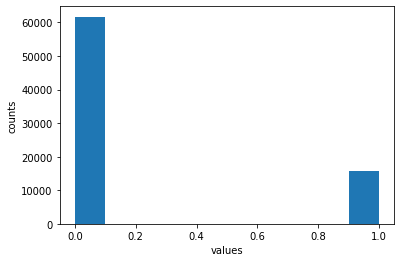

In [13]:
x = arr.flatten()
## plot
plt.hist(x, bins = 10)
plt.xlabel('values')
plt.ylabel('counts')

We can use imshow to visualise 2D arrays

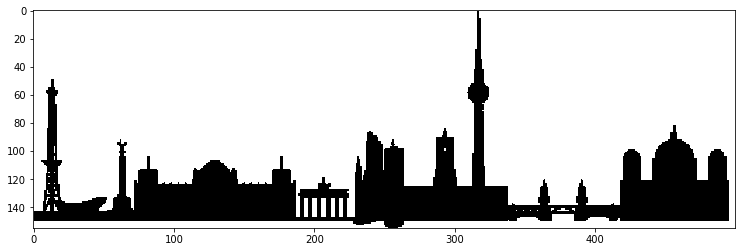

In [14]:
plt.figure(figsize=(14,4))
plt.imshow(arr)

## Slice the Brandenburg Gate

### Indexing  and slicing


```python
arr[ axis0_indices, axis1_indices, ...]
```

<img src="https://scipy-lectures.org/_images/numpy_indexing.png" alt="slicing" width="500"/>

Image from https://scipy-lectures.org


**Like lists**, you can use slicing

```python
arr[ item_index ]
arr[ start : stop ]
arr[ start : stop : step ]
```

**Unlike lists** you can

Use commas to refer to the different axes of the array.


Using sling to view the Brandenburg Gate

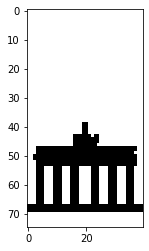

In [15]:
BrandenburgGate = arr[80:, 187:227]

plt.imshow(BrandenburgGate)
#BrandenburgGate

Use slicing to assign new values

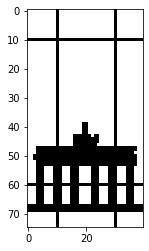

In [16]:
BrandenburgGate[:, 10::20] = 1  # vertical line
BrandenburgGate[10::50, :] = 1  # horizontal line

plt.imshow(BrandenburgGate)

Let's go back to the full image

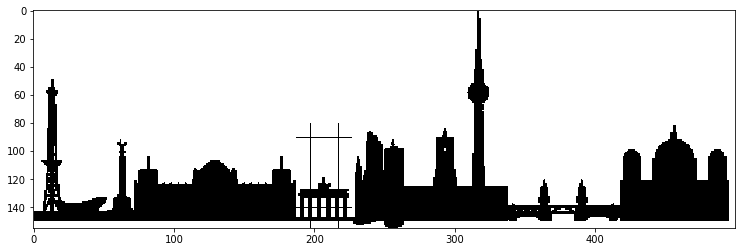

In [18]:
plt.figure(figsize=(14,4))
plt.imshow(arr)

😯 Sling shows views of the same object!

You can prevent this to happen by creating a new object `BrandenburgGate = np.array(arr[::, 188:227])`

### Advanced indexing

Also called fancy indexing

<img src="https://scipy-lectures.org/_images/numpy_fancy_indexing.png" alt="fancy indexing" width="800"/>

Image from https://scipy-lectures.org

## What else can you do with NumPy?

### You can do maths

#### Elementwise operations (unlike lists)

A new array is created and filled with the result.

##### Arithmetic operators

```python

    a-b

    b**2

    a < 35

    A*B  # elementwise product

    A.dot(B)  # matrix product
    
```

Some operations, such as += and *=, act in place, modify an existing array rather than create a new one. 

```python
    a *= 3
```

##### Universal Functions (ufunc)

```python
    np.exp()

    np.sqrt()
    
    np.sin()

```
    

## Let's apply our knowledge  adding snow to the city

Generate snow

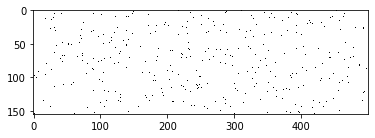

In [19]:
snow = np.zeros_like(arr)
snow_density = int(np.size(arr)*0.01)

## Draw positions (pixels) randomly
idx0 = np.random.randint(0, len(snow[:, 0]), size=snow_density)
idx1 = np.random.randint(0, len(snow[0, :]), size=snow_density) #p.random.permutation(np.arange(n1))

## Create snow using advanced indexing
snow[idx0, idx1] = 1
plt.imshow(snow)

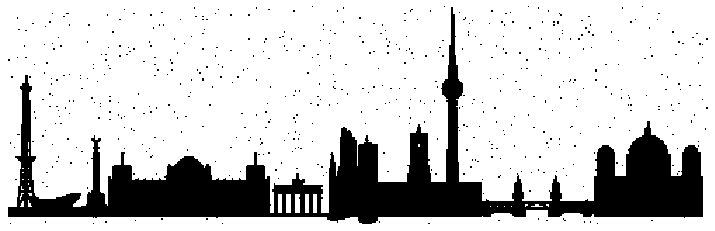

In [22]:
inF = 'data/some_data.txt'
arr = np.loadtxt(inF)

plt.figure(figsize=(14,4))
plt.axis('off')
plt.imshow(np.logical_or(snow, arr))

Now that we are experts on NumPy, let's load another dataset

## Summary

1. How to do convenient, fast math with NumPy
2. NumPy arrays
	* **attributes**: size, shape, ndim
    * how to create them: element by element or generating them (linespace, random)
    * operations, slicing and indexing
3. Simple visulisation with Matplotlib

# Exercises

## Make the colour of the city vary horizontally with a gradient.

1. Use `np.linspace` to generate a one dimensional vector of size n (number of columns of the image) with a constant gradient.

2. Apply a gradient to the city by multiplying this vector with the image

<!---
inF = 'some_data.txt'#./arr.txt'
M = np.loadtxt(inF)
plt.figure(figsize=(14,4))
Mgrad = M*np.linspace(20, 50, n1)
#Mgrad*=200
plt.imshow(Mgrad)
--->

# References


* Scipy lectures https://scipy-lectures.org/intro/numpy/array_object.html

* Ramiro Gómez, What are the Most Edited Pages in the English Wikipedia? [Blog](http://ramiro.org/notebook/wikipedia-most-revisions/)
    
### Parts of these slides were taken from

* https://github.com/MPIDS/introduction_to_programming 
* https://github.com/MPIDS/Python-Course/tree/master/03-numpy-scipy/talks


### Images

* NumPy logo -- David Cournapeau [BSD (http://opensource.org/licenses/bsd-license.php)]

* Python Scientific Stack -- https://image.slidesharecdn.com/scientific-python-151121091532-lva1-app6892/95/scientific-python-28-638.jpg?cb=1448101074

* NumPy Arrays -- https://medium.com/datadriveninvestor/artificial-intelligence-series-part-2-numpy-walkthrough-64461f26af4f

* Berlin silhouette -- modified from https://commons.wikimedia.org/wiki/File:Silhouette_Berlin.svg

* Slicing summary -- https://scipy-lectures.org/intro/numpy/array_object.html

* Fancy indexing -- https://scipy-lectures.org/_images/numpy_fancy_indexing.png


# Further material

### Python modules for Data Science

* Basis
    * Numpy, Matplotlib
* Exploratory data analysis
    * Pandas
    * Seaborn
* Machine learning
    * Scikit-learn
    * Tensorflow

### Cheat sheets

* [Jupyter-Notebook](https://datacamp-community-prod.s3.amazonaws.com/48093c40-5303-45f4-bbf9-0c96c0133c40)
* [NumPy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
* [Pandas](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf)

